# Adesso adaptado no Colab

## Vídeos antigos
* [Adesso1-mm-1-7 (86min)](https://www.loom.com/share/92fbb710f02646c59d45c4e8fcfbc469) após 1h06m

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2, requests, sys
import numpy as np

In [2]:
# download _morph.py from drive
!pip install -U --no-cache-dir gdown --pre
!gdown --id 1FlMtAkb0npwmD54aCysLsxB84PehcKMe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.4
    Uninstalling gdown-4.6.4:
      Successfully uninstalled gdown-4.6.4
/usr/local/lib/python3.9/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1FlMtAkb0npwmD54aCysLsxB84PehcKMe
From (redirected): https://drive.google.com/uc?id=1FlMtAkb0npwmD54aCysLsxB84PehcKMe&confirm=t&uuid=bf6d7897-abd4-452d-ad26-68d7c79bb26f
To: /content/_morph.py
100% 38.3k/38.3k [00:00<00:00, 35.3MB/s]


In [3]:
from _morph import *
help(mm.watershed)

Help on function watershed in module _morph:

watershed(f, mark, op='region')
    This function will create the watershed
    input:
      - f: input image
        - f==[] # binary watershed by skimage
        - else  # condictional watershed by cv2
      - mark: markers image
      - op: region or line [default: region]
    
    output:
      - y: watershed



# mmwatershed

In [4]:
!gdown --id 1Hca_5yuqvuLnTG4Ri3rIi3EOPAQj4UYj

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Hca_5yuqvuLnTG4Ri3rIi3EOPAQj4UYj
To: /content/rand_circly.tif
100% 1.94k/1.94k [00:00<00:00, 2.45MB/s]


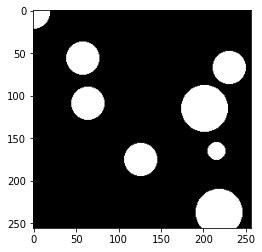

In [5]:
#https://drive.google.com/open?id=1Hca_5yuqvuLnTG4Ri3rIi3EOPAQj4UYj
#img = mm.read('https://drive.google.com/file/d/1Hca_5yuqvuLnTG4Ri3rIi3EOPAQj4UYj')
img = cv2.imread('rand_circly.tif',-1)
img2 = cv2.cvtColor(img ,cv2.COLOR_GRAY2RGB) # converte para grayscale
f = mm.threshold(img)
#f = f[:50,:50]
img2 = img2#[:50,:50]
mm.show(f)  

In [6]:
def water0(f,b=np.ones((3,3),dtype= 'uint8')):
  f = mm.label0(f,b)
  h,w = f.shape
  bh, bw = b.shape
  g = f.copy()
  while np.amin(g)==0:
    for x in range(h):
      for y in range(w):
          for bx in range(bh):
            for by in range(bw):
              viz_x = int(x + bx - bh/2 + 0.5)
              viz_y = int(y + by - bw/2 + 0.5)
              if 0 <= viz_x < h and 0 <= viz_y < w:
                if g[x,y] == 0 and g[x,y] < f[viz_x,viz_y]:
                  g[x,y] = f[viz_x,viz_y]
    f = g.copy()
  return g

In [7]:
def waterB(f,m,b=np.ones((3,3),dtype= 'uint8')):
  m = mm.label0(m,b)
  h,w = f.shape
  bh, bw = b.shape
  queue = []
  for x in range(h):
    for y in range(w):
      if m[x,y]:
        for bx in range(bh):
          for by in range(bw):
            viz_x = int(x + bx - bh/2 + 0.5)
            viz_y = int(y + by - bw/2 + 0.5)
            if 0 <= viz_x < h and 0 <= viz_y < w:
              if not m[viz_x,viz_y]:
                queue.append([abs(f[x,y]-f[viz_x,viz_y]), x, y])
                
  while len(queue):
    #queue = sorted(queue, key=lambda a:a[0])
    cor_diff,x,y = queue.pop(0)
    cor = m[x,y]
    for bx in range(bh):
      for by in range(bw):
        viz_x = int(x + bx - bh/2 + 0.5)
        viz_y = int(y + by - bw/2 + 0.5)
        if 0 <= viz_x < h and 0 <= viz_y < w:
          if not m[viz_x,viz_y]:
            m[viz_x,viz_y] = cor
            queue.append([abs(f[x,y]-f[viz_x,viz_y]), viz_x, viz_y])

  return m

In [8]:
import time
inicio = time.time()
g = mm.water0(f).astype('uint8')
print(time.time()-inicio)

80.99061822891235


In [10]:
import time
inicio = time.time()
g0 = mm.waterB(f,f).astype('uint8')
print(time.time()-inicio)

2.1812491416931152


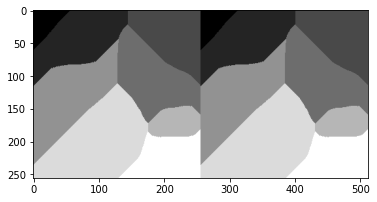

In [12]:
mm.show(cv2.hconcat((g, g0))) 

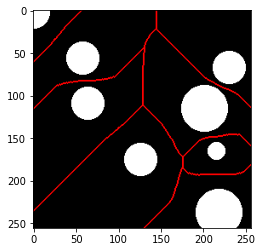

In [13]:
mm.show(img2,mm.gradm(g,mm.secross()))

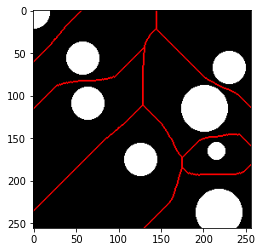

In [14]:
mm.show(img2,mm.gradm(g0,mm.secross()))

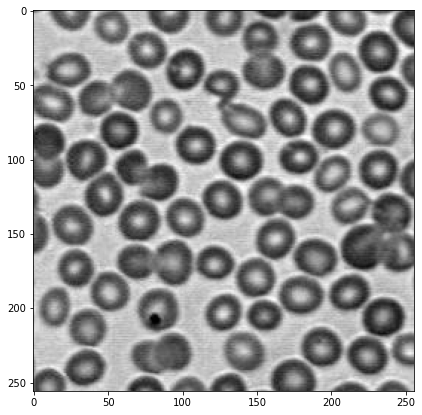

In [15]:
img = mm.read('https://drive.google.com/file/d/1nS7OyC6Tf1mpu4kjs-G-AXt5T3XSo9nC/view?usp=sharing')
a = cv2.cvtColor(img ,cv2.COLOR_BGR2GRAY) # converte para grayscale
#a = a[30:78,:50]
img2 = img#[30:78,:50]
plt.figure(figsize=(7, 7))
mm.show(a)  

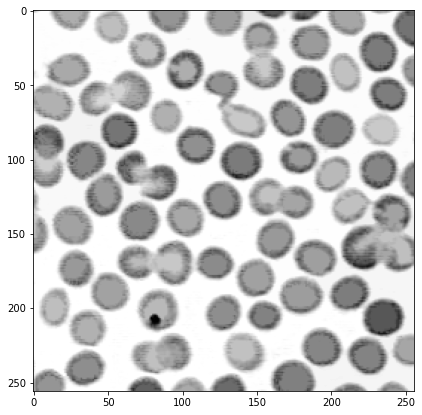

In [16]:
b = mm.areaopen(a,200)
plt.figure(figsize=(7, 7))
mm.show(b)

In [17]:
np.amax(b)

7884273

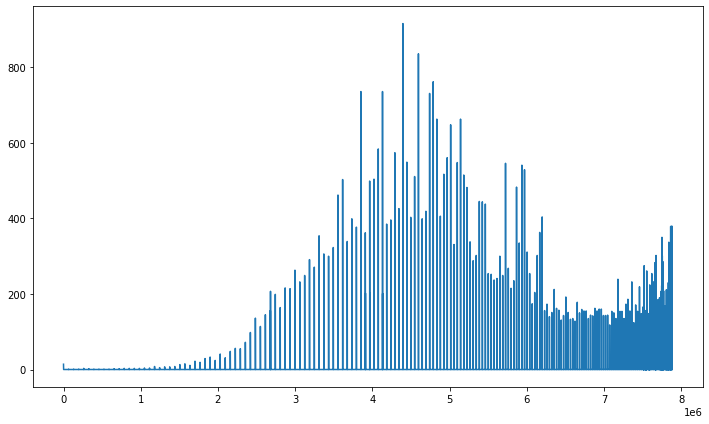

In [18]:
hist,bins = np.histogram(b.ravel(),np.amax(b),[0,np.amax(b)])
plt.figure(figsize=(12, 7))
plt.plot(hist)

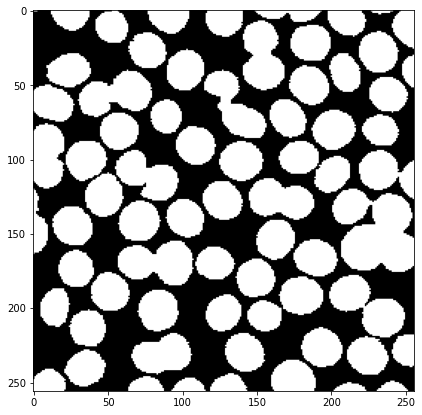

In [19]:
c = np.array(b<6700000, dtype='uint8')*255
#c = np.array(b<125000, dtype='uint8')*255
plt.figure(figsize=(7, 7))
mm.show(c)

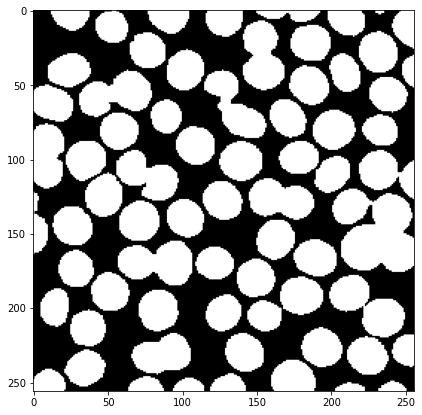

In [20]:
d = mm.open(c,mm.sedisk(5))
plt.figure(figsize=(7, 7))
mm.show(d) 

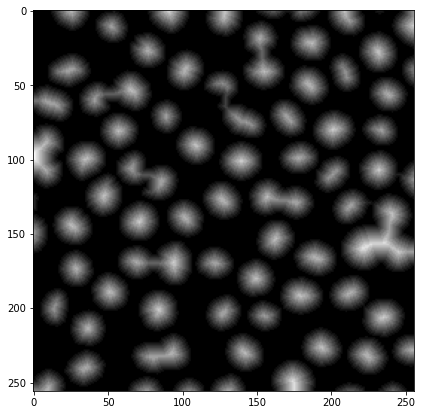

In [21]:
e = mm.dist(d)
plt.figure(figsize=(7, 7))
mm.show(e)

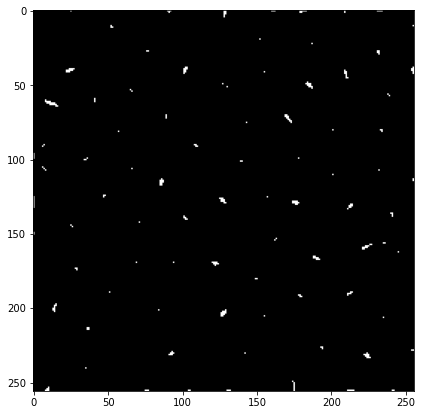

In [22]:
f = mm.regmax(e,mm.secross())
plt.figure(figsize=(7, 7))
mm.show(f)

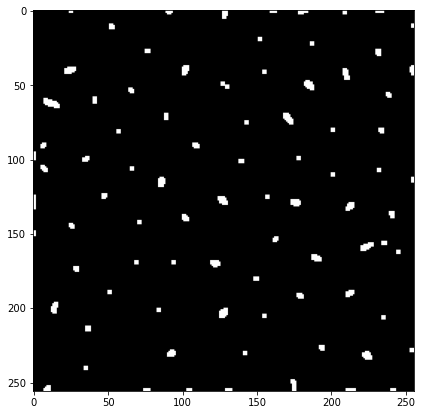

In [23]:
g1 = mm.dil(f)
g1 = np.array(mm.dil(g1,mm.sedisk(1))>0,dtype='uint8')*255
plt.figure(figsize=(7, 7))
mm.show(g1)

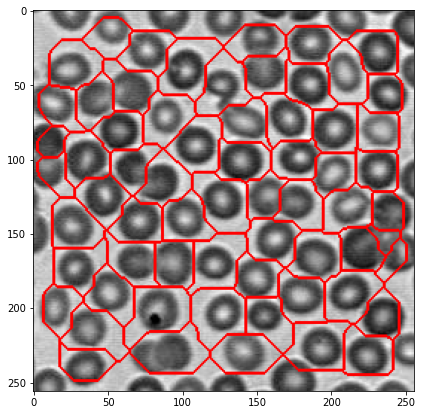

In [24]:
G = mm.edgeoff(g1)
G = mm.union(G,mm.frame(G,1))
gg = mm.water0(G).astype('uint8')
plt.figure(figsize=(7, 7))
mm.show(img2,mm.gradm(gg,mm.secross()))

/content/_morph.py:827: RuntimeWarning: overflow encountered in ubyte_scalars
  queue.append([abs(f[x,y]-f[viz_x,viz_y]), x, y])
/content/_morph.py:840: RuntimeWarning: overflow encountered in ubyte_scalars
  queue.append([abs(f[x,y]-f[viz_x,viz_y]), viz_x, viz_y])


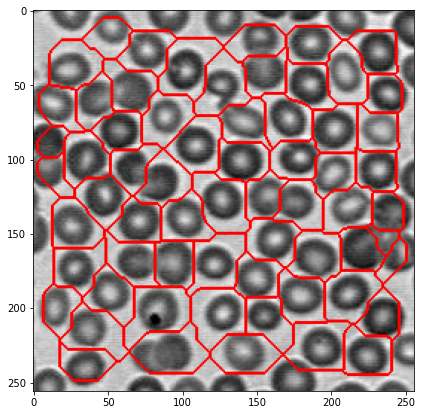

In [25]:
G = mm.edgeoff(g1)
G = mm.union(G,mm.frame(G,1))
h = mm.waterB(mm.neg(e),G).astype('uint8')
plt.figure(figsize=(7, 7))
mm.show(img2,mm.gradm(h,mm.secross(0)))